# Netflix Data Analysis

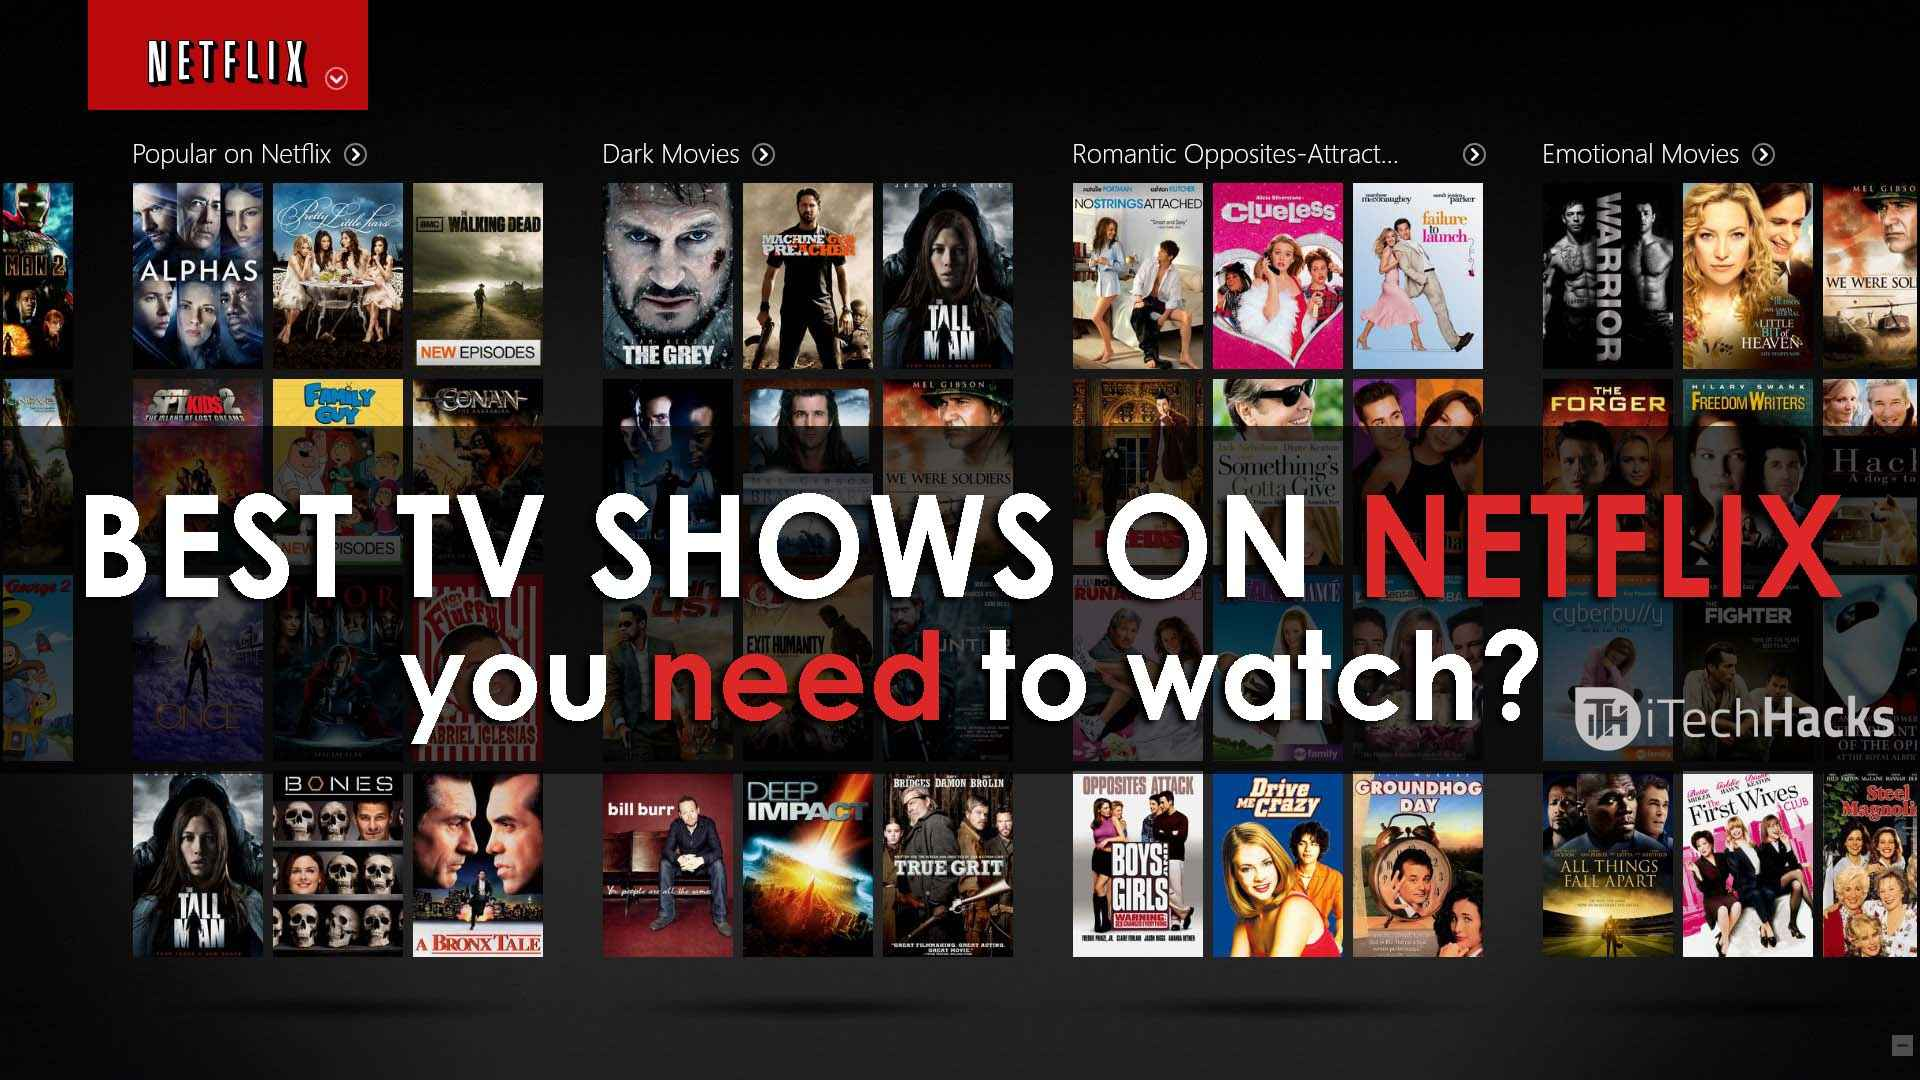

**Netflix, Inc. is an American media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service, which offers online streaming of a library of films and television programs, including those produced in-house. As of April 2020, Netflix had over 182 million paid subscriptions worldwide, including 69 million in the United States. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.**

Now we will import the necessary libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel

Now we will load the dataset.

In [ ]:
df=pd.read_csv("../input/netflix-shows/netflix_titles.csv")
df.head()

Now we will check the data shape, that is how many rows and columns are there in the dataset.

In [ ]:
df.shape

Now we will check whether there is any missing values for any of the columns or not.

In [ ]:
df.isnull().sum()

So from above we can see that director column has highest number of missing values, then cast and then country. Others like date_added and rating has also missing values but they are quite marginal.

**Now we will start our exploration for the variables mostly using visualization.**

In [ ]:
plt.figure(figsize=(14,7))
df["type"].value_counts().plot(kind="pie",shadow=True,autopct = '%1.1f%%')

So from the above visualization we can see that netflix has more movies than TV shows till the last updated date. It has 68.4% movies and 31.6% TV shows.

Now we will generate a wordcloud for the countries which will show the frequency where both the movies and TV shows release is maximum.

In [ ]:
count=list(df['country'].dropna().unique())
cloud=WordCloud(colormap="cool",width=800,height=400).generate(" ".join(count))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

So we can see from above that most movies and TV shows that are there in netflix is in USA. Also we will see the actual frequency using barplot in the next visualization.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["country"].value_counts()[:20].plot(kind="bar",color="lightcoral")
plt.title("Top 20 countries in terms of maximum number of movies on netflix",size=18)

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["country"].value_counts()[:20].plot(kind="bar",color="mediumslateblue")
plt.title("Top 20 countries in terms of maximum number of TV shows on netflix",size=18)

So we can see that both in terms of movies and TV show, USA is on the top. Next we will see year wise frequency in descending order for both TV shows and movies. First we will see for combined TV shows and movies, then we will see frequency for both individually.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df["release_year"].value_counts()[:20].plot(kind="bar",color="green")
plt.title("Frequency of both TV Shows and movies which are released in different years",size=16)

So from the above we can see that movies and TV shows that are released in the year 2018 are mostly in netflix. Now we will see individually for both movies and TV series.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="darkorange")
plt.title("Frequency of Movies which are released in different years and are there in netflix",size=16)

So from the above we can see that movies that are released in the 2017, are mostly there in the netflix, then movies that are released in the year 2018 is there, and so on, you can see from the above graph.

Now let's see some of the movie names that are released in the year 2017.

In [ ]:
df[(df["type"]=="Movie") & (df["release_year"]==2017)]["title"].sample(10)

Now we will see for TV shows.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="mediumblue")
plt.title("Frequency of TV shows which are released in different years and are there in netflix",size=16)

So we can see that TV shows that are released in the year 2019, are mostly there in the netflix, then which are released in the year 2018 are there. Now let's see some of the TV show names released in the year 2019.

In [ ]:
df[(df["type"]=="TV Show") & (df["release_year"]==2019)]["title"].sample(10)

Now we will generate wordcloud for the genres for both movie and TV shows.

In [ ]:
listed=list(df['listed_in'].unique())
cloud=WordCloud(colormap="Wistia",width=600,height=400).generate(" ".join(listed))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for genre for all category",size=18)

Next we will generate wordcloud for the genre for movie category.

In [ ]:
listed2=list(df[df["type"]=="Movie"]['listed_in'].unique())
cloud=WordCloud(colormap="summer",width=600,height=400).generate(" ".join(listed2))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for genre for movie category",size=18)

Now we will generate wordcloud for the genre for TV Show category.

In [ ]:
listed3=list(df[df["type"]=="TV Show"]['listed_in'].unique())
cloud=WordCloud(colormap="YlOrRd",width=600,height=400).generate(" ".join(listed3))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for genre for TV show category",size=18)

Now we will explore a little more "listed_in" variable, which is the genre here and we will see the top 20 most frequent genres for movie category for all the years.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:20].plot(kind="barh",color="red")
plt.title("20 most frequent genre for movie type for all the years",size=18)

So from the above we can say that most of the movies in the netflix are of the documentary genre, next is stand up comedy. Now let's see some of the movie names in the documantary category.

In [ ]:
df[(df["listed_in"]=="Documentaries") & (df["type"]=="Movie")]["title"].sample(10)

Now we will see 20 most frequent genre for the TV Shows.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(11,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:20].plot(kind="barh",color="darkviolet")
plt.title("20 most frequent genre for TV show type for all the years",size=18)

So we can see that most frequent genre in the TV Show category is Kids' TV, so now let's see some of the names in this category.

In [ ]:
df[(df["listed_in"]=="Kids' TV") & (df["type"]=="TV Show")]["title"].sample(10)

Now let's see the frequency of genre in the movie category only for the year 2019.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[(df["type"]=="Movie") & (df["release_year"]==2019)]["listed_in"].value_counts()[:20].plot(kind="barh",color="lime")
plt.title("20 most frequent Genre for movie type for the year 2019",size=18)

So movies that are released in the year 2019 is mostly stand-up comedy. Now we will see for the TV Shows for the year 2019. You can do for any year, I just want to check for the year 2019.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(11,6))
df[(df["type"]=="TV Show") & (df["release_year"]==2019)]["listed_in"].value_counts()[:20].plot(kind="barh",color="teal")
plt.title("20 most frequent genre for TV show type for the year 2019",size=18)

So TV Shows released in the year 2019 are mostly of the Kids' TV type.

Now we will do some EDA for the rating variable. But before starting anything else, let's know some about the ratings that are there in our dataset. The rating categories given in our dataset are as follows, also a short description of the ratings are also given:
1. TV-MA - Programming rated TV-MA in the United States by the TV Parental Guidelines signifies content for mature audiences only. Programs with this rating are usually not suitable for anyone under 17 years of age (under 18 in some cases). 

2. TV-14 - Programming rated TV-14 in the United States TV Parental Guidelines signifies content with parents strongly cautioned. Content may be inappropriate for children younger than 14 years of age.

3. TV-PG - Programming rated TV-PG as stated in the United States TV Parental Guidelines signifies content with parental guidance suggested. 

4. R(restricted) - No one under 17 admitted without an accompanying parent or guardian.

5. PG-13 - Some Material May Be Inappropriate for Children Under 13. Oh, also, here's a reason. Rated PG-13 for intense violence/sci-fi violence, language, peril and thematic elements.

6. NR - (Not rated) This film has not yet been rated by the MPAA.

7. PG - Some material may not be suitable for children. The movie may have mildly strong language and some violence, but no substance use or physical abuse.

8. TV-Y7 - Programming rated TV-Y7 in the United States TV Parental Guidelines signifies content that is suitable for children who are at least 7 years old. Many of these programs contain cartoon slapstick violence, humor that may be considered too ribald or morbid for younger viewers, mild innuendo, and/or themes and stories that would be considered too controversial, scary or incomprehensible for younger audiences. 

9. TV-G - Programming rated TV-G in the United States TV Parental Guidelines signifies content that is suitable for all audiences. Some children's programs that have content that teens or adults will relate to use a TV-G rating, as opposed to a TV-Y rating. This rating is also used for shows with inoffensive content (such as cooking shows, religious programming, nature documentaries, shows about pets and animals, classic television shows, and many shows on Disney Channel carry this rating

10. TV-Y - Programming rated TV-Y in the United States TV Parental Guidelines, signifies content that is suitable for all children ages newborn-6 (particularly those of preschool or kindergarten age, as this rating is commonly seen in early childhood shows, and non-preschool or kindergarten age).

11. TV-Y7-FV - Programming rated TV-Y7-FV is recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence. Mohana Shashi: The Series is the only Series on Nick Jr. that has the rating of TV-Y7-FV, but in April 8, 2020, when The Second Generation Series has premiered on Nick Jr. and Discovery Family, it was changed to TV-Y because it has became a popular preschool and kids show and it can be viewed for babies, toddlers, preschoolers, and little kids.

12. G - G ratings are most notable for what the films don’t include: sex and nudity, substance abuse, or realistic/noncartoon violence.

13. UR - Typically reserved for previews of films not yet officially rated by the MPAA. A green title card indicates the preview is safe for all viewers, while red is for mature audiences. Also there is slight difference between NR and UR, and that is NR movie or show has not yet presented to the board, but UR has been presented.

14. NC-17 - An NC-17 rated motion picture is one that, in the view of the Rating Board, most parents would consider patently too adult for children 17 and under.****

Now we will see frequency of ratings for all the movies and TV shows for all the years. 

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df["rating"].value_counts().plot(kind="bar",color="orange")
plt.title("Frequency of ratings for both TV shows & movies for all the years",size=18)

Now we will see rating frequency for only movie category.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["rating"].value_counts().plot(kind="bar",color="royalblue")
plt.title("Frequency of ratings for movie category for all the years",size=18)

Now we will see rating frequency for only TV Show category.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["rating"].value_counts().plot(kind="bar",color="orangered")
plt.title("Frequency of ratings for TV show category for all the years",size=18)

# Now let's compare rating between India and USA.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[(df["country"]=="United States") & (df["type"]=="Movie")]["rating"].value_counts().plot(kind="bar",color="slateblue")
plt.title("Rating for Movies that are released in USA",size=18)

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[(df["country"]=="India") & (df["type"]=="Movie")]["rating"].value_counts().plot(kind="bar",color="deeppink")
plt.title("Rating for Movies that are released in India",size=18)

Now we will see for TV shows for both the countries.

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[(df["country"]=="United States") & (df["type"]=="TV Show")]["rating"].value_counts().plot(kind="bar",color="fuchsia")
plt.title("Rating for TV Shows that are released in USA",size=18)

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[(df["country"]=="India") & (df["type"]=="TV Show")]["rating"].value_counts().plot(kind="bar",color="gold")
plt.title("Rating for TV Shows that are released in India",size=18)

Finally I will conclude first part of the analysis by creating some wordclouds for the movie and TV show names for the year 2019.

In [ ]:
listed4=list(df[(df["release_year"]==2019) & (df["type"]=="Movie")]['title'])
cloud=WordCloud(colormap="YlOrRd",width=600,height=400).generate(" ".join(listed4))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for movie names which are released in the year 2019",size=18)

Now we will create wordcloud for the TV shows name which are released in the year 2019.

In [ ]:
listed4=list(df[(df["release_year"]==2019) & (df["type"]=="TV Show")]['title'])
cloud=WordCloud(colormap="winter",width=600,height=400).generate(" ".join(listed4))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for genre for TV Show category released in 2019",size=18)

# **Topic Modelling**

So now we are going to start our second part of the analysis, here we will only deal with the description column, and our intention is to see whether we can successfully extract topics from the description column or not, and we will start with bringing the description column, and then cleaning it.

In [ ]:
data=pd.DataFrame(df["description"])
pd.set_option("display.max_colwidth", 200)
data.head()

Next we will calculate the word count for each description.

In [ ]:
data['Number of words'] = data['description'].apply(lambda x:len(str(x).split()))
data.head()

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data["Number of words"], kde=False, color="red",bins=8)
plt.xlabel("Number of words",size=15)
plt.ylabel("count",size=15)
plt.title("Distribution of number of words in the documents",size=15)

In [ ]:
data["Number of words"].describe()

Now we will start our text processing steps.

In [ ]:
def clean_text(text):
    clean=text.lower()
    clean=re.sub("[^a-z]"," ",clean)
    clean=re.sub(r"\s+[a-z]\s+"," ",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
data["cleaned_text"]=data["description"].apply(clean_text)

Now we will generate wordcloud to see whether processed text doesn't carry much noise.

In [ ]:
cloud=WordCloud(colormap="PuBuGn",width=800,height=400).generate(str(data["cleaned_text"]))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

So our text seems pretty clear, so now we will move to our next text preprocessing steps, which are stopwords removal, tokenization and lemmatization.

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stop=stopwords.words('english')
data["stops_removed"]=data["cleaned_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
data["tokenized"]=data["stops_removed"].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
data["lemmatized"]=data["tokenized"].apply(lambda x: word_lemmatizer(x))
data["joined"]=data["lemmatized"].apply(lambda x: ' '.join(x))

In [ ]:
data["stops_removed_2"]=data["joined"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Now our text is all clear, now we will proceed towards creating the LDA model, basically we will use LDA for topic modelling here. Also before creating the model we need to prepare the input, the input will be basically in the form of document term matrix, after converting that using the below step, we will then feed that into the LDA model.

In [ ]:
dictionary = corpora.Dictionary(data["lemmatized"])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in data["lemmatized"]]

First we will see with 15 topics, and see its coherence score, then in the later stage we will try more number of topics and will see which one is giving us high coherence score, then we will move with that. Basically coherence score helps us in determining how many topics should we select, we should select number of topics with high coherence score.

In [ ]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
                chunksize=1000, passes=50)

In [ ]:
lda_model.print_topics()

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model,
texts=data["lemmatized"], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Now let's visualize this.

In [ ]:
pyLDAvis.enable_notebook(sort=True)
vis_2 = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(vis_2)

Now let's check coherence score for different number of topics, basically this is not a good idea, we should find the optimum number of topics, and there is another way of doing it, but here we will try this approach.

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=data["lemmatized"], start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.figure(figsize=(12,6))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

So coherence model is suggesting that we should go with something around 37 topics, so let's try that.

In [ ]:
lda_model_2 = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=37, random_state=120,
                chunksize=1000, passes=50)

Now we will check the coherence score for it.

In [ ]:
coherence_model_lda_2 = CoherenceModel(model=lda_model_2,
texts=data["lemmatized"], dictionary=dictionary, coherence='c_v')
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score: ', coherence_lda_2)

Now let's visualize it.

In [ ]:
pyLDAvis.enable_notebook(sort=True)
vis = pyLDAvis.gensim.prepare(lda_model_2, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(vis)

**But clearly, coherence score suggesting higher score for 37 than for topic number 15, but we can see that there is lot of overlapping in the topics in case of 37, than that of topics 15, so very soon we will come up with the optimum number of topics and finish the business.**